In [30]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
from utils import train, test
import torch.nn.functional as F

In [32]:
!pip install torchsummary  # Install torchsummary if necessary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net()  # Instantiate your 'Net' model class
model.to(device)
summary(model, input_size=(1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,320
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 30, 22, 22]           4,350
              ReLU-8           [-1, 30, 22, 22]               0
       BatchNorm2d-9           [-1, 30, 22, 22]              60
           Conv2d-10           [-1, 30, 11, 11]             930
             ReLU-11           [-1, 30, 11, 11]               0
      BatchNorm2d-12           [-1, 30, 11, 11]              60
           Conv2d-13             [-1, 16, 9, 9]           4,336
             ReLU-14             [-1, 1

In [33]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])



In [ ]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [34]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [ ]:
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

loss=1.2173527479171753 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.89it/s]



Test set: Average loss: 1.1897, Accuracy: 6630/10000 (66%)



loss=0.6848885416984558 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.26it/s]



Test set: Average loss: 0.7858, Accuracy: 7636/10000 (76%)



loss=0.4121369421482086 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.66it/s]



Test set: Average loss: 0.4382, Accuracy: 8817/10000 (88%)



loss=0.4312758445739746 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 27.08it/s]



Test set: Average loss: 0.3825, Accuracy: 8904/10000 (89%)



loss=0.3979477882385254 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.07it/s]



Test set: Average loss: 0.2591, Accuracy: 9313/10000 (93%)



loss=0.38943782448768616 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 27.10it/s]



Test set: Average loss: 0.2084, Accuracy: 9459/10000 (95%)



loss=0.24921585619449615 batch_id=468: 100%|██████████| 469/469 [00:18<00:00, 25.98it/s]



Test set: Average loss: 0.1816, Accuracy: 9546/10000 (95%)



loss=0.32015618681907654 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 27.19it/s]



Test set: Average loss: 0.1506, Accuracy: 9606/10000 (96%)



loss=0.25692567229270935 batch_id=468: 100%|██████████| 469/469 [00:18<00:00, 25.87it/s]



Test set: Average loss: 0.1580, Accuracy: 9578/10000 (96%)



loss=0.15795545279979706 batch_id=468: 100%|██████████| 469/469 [00:18<00:00, 25.55it/s]



Test set: Average loss: 0.1770, Accuracy: 9520/10000 (95%)



loss=0.14402595162391663 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 27.48it/s]



Test set: Average loss: 0.1747, Accuracy: 9498/10000 (95%)



loss=0.17057400941848755 batch_id=468: 100%|██████████| 469/469 [00:18<00:00, 25.89it/s]



Test set: Average loss: 0.1765, Accuracy: 9469/10000 (95%)



loss=0.19886571168899536 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.46it/s]



Test set: Average loss: 0.1609, Accuracy: 9551/10000 (96%)



loss=0.11348976939916611 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 27.17it/s]



Test set: Average loss: 0.1254, Accuracy: 9660/10000 (97%)



loss=0.3761601150035858 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.23it/s]



Test set: Average loss: 0.2096, Accuracy: 9367/10000 (94%)



loss=0.19654424488544464 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 27.00it/s]



Test set: Average loss: 0.1197, Accuracy: 9669/10000 (97%)



loss=0.29991602897644043 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.13it/s]



Test set: Average loss: 0.1226, Accuracy: 9644/10000 (96%)



loss=0.13325725495815277 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.81it/s]



Test set: Average loss: 0.1316, Accuracy: 9637/10000 (96%)



loss=0.233312726020813 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.06it/s]



Test set: Average loss: 0.1157, Accuracy: 9659/10000 (97%)



In [35]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

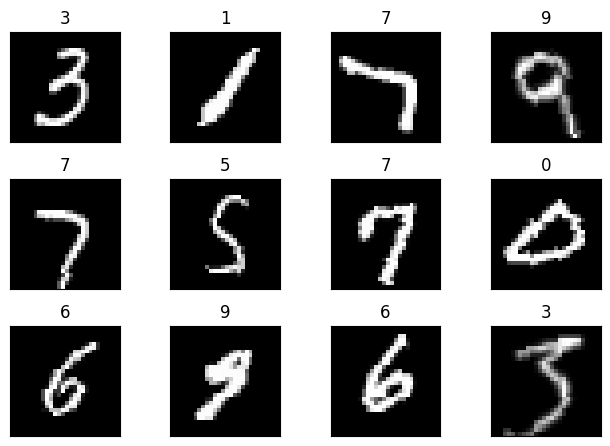

In [36]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [37]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.0681 Batch_id=117 Accuracy=86.82: 100%|██████████| 118/118 [00:18<00:00,  6.23it/s]


Test set: Average loss: 0.0693, Accuracy: 9812/10000 (98.12%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.0246 Batch_id=117 Accuracy=97.87: 100%|██████████| 118/118 [00:19<00:00,  6.10it/s]


Test set: Average loss: 0.0439, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0154 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [00:20<00:00,  5.83it/s]


Test set: Average loss: 0.0324, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.1528 Batch_id=117 Accuracy=98.59: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]


Test set: Average loss: 0.0373, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.0254 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]


Test set: Average loss: 0.0282, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0129 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:19<00:00,  5.92it/s]


Test set: Average loss: 0.0249, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 7


Train: Loss=0.0296 Batch_id=117 Accuracy=98.90: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]


Test set: Average loss: 0.0268, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 8


Train: Loss=0.0591 Batch_id=117 Accuracy=98.90: 100%|██████████| 118/118 [00:20<00:00,  5.74it/s]


Test set: Average loss: 0.0225, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 9


Train: Loss=0.0440 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:20<00:00,  5.82it/s]


Test set: Average loss: 0.0283, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 10


Train: Loss=0.0201 Batch_id=117 Accuracy=99.05: 100%|██████████| 118/118 [00:19<00:00,  6.01it/s]


Test set: Average loss: 0.0254, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 11


Train: Loss=0.0151 Batch_id=117 Accuracy=99.27: 100%|██████████| 118/118 [00:20<00:00,  5.82it/s]


Test set: Average loss: 0.0183, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 12


Train: Loss=0.0069 Batch_id=117 Accuracy=99.33: 100%|██████████| 118/118 [00:20<00:00,  5.74it/s]


Test set: Average loss: 0.0179, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 13


Train: Loss=0.0069 Batch_id=117 Accuracy=99.37: 100%|██████████| 118/118 [00:20<00:00,  5.75it/s]


Test set: Average loss: 0.0173, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 14


Train: Loss=0.0239 Batch_id=117 Accuracy=99.38: 100%|██████████| 118/118 [00:19<00:00,  5.94it/s]


Test set: Average loss: 0.0171, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 15


Train: Loss=0.0081 Batch_id=117 Accuracy=99.34: 100%|██████████| 118/118 [00:20<00:00,  5.87it/s]


Test set: Average loss: 0.0174, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 16


Train: Loss=0.0081 Batch_id=117 Accuracy=99.33: 100%|██████████| 118/118 [00:20<00:00,  5.71it/s]


Test set: Average loss: 0.0175, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 17


Train: Loss=0.0258 Batch_id=117 Accuracy=99.37: 100%|██████████| 118/118 [00:20<00:00,  5.73it/s]


Test set: Average loss: 0.0177, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 18


Train: Loss=0.0400 Batch_id=117 Accuracy=99.39: 100%|██████████| 118/118 [00:26<00:00,  4.47it/s]


Test set: Average loss: 0.0175, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 19


Train: Loss=0.0330 Batch_id=117 Accuracy=99.39: 100%|██████████| 118/118 [00:20<00:00,  5.63it/s]


Test set: Average loss: 0.0172, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 20


Train: Loss=0.0101 Batch_id=117 Accuracy=99.42: 100%|██████████| 118/118 [00:20<00:00,  5.89it/s]


Test set: Average loss: 0.0171, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 5.0000e-04.


[]

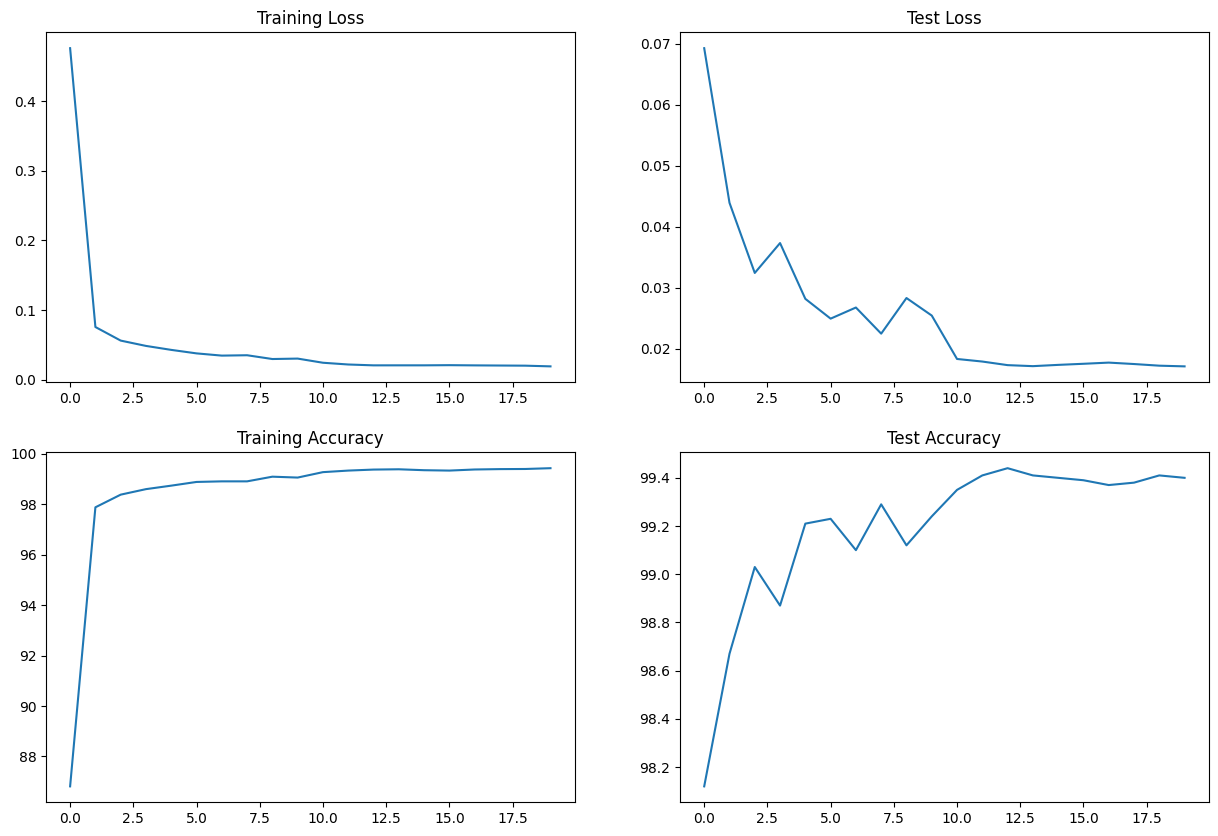

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()